# Face Recognition

Ahmed Amer, Nicholas Lee, Christian Valdez

we are using the ATT face database in the data folder

Three methods are implemented and compared in the following order:
- LBP
- Neural Networks
- SVM

## Importing Data

In [125]:
import os
from glob import glob

from skimage.io import imread
from skimage.feature import local_binary_pattern

import cv2
import numpy as np
import matplotlib.pyplot as plt
# import data - can probably copy from lab 6

In [126]:
#constants
NUM_OF_SUBJECT = 40
NUM_OF_SAMPLES_PER_SUBJECT = 10

## LBP - Christian Valdez

Process images and set up inputs for Nick and Ahmed

we will make 4 models total, 2 using LBP and 2 using images as given

In [127]:
def read_pgm(dataset_path: str):
    '''reads pgm file'''

    try:
        print(f'reading {dataset_path}')
        # img = cv2.imread(dataset_path, 1)
        img = imread(dataset_path, as_gray=True)

    except Exception as error:
        print(f'{error}: {dataset_path} not found, skipping')

    else:
        return img
    
def make_gallery(path_prefix: str, pgm_filename: list[int]) -> list:
    '''

        Description
        ================================================
        creates gallery of lbp and labels
        
        ...

        calls the function read_pgm to read pgm file using imread from skimage
        returns list of lbp and list of labels

        Variable Description
        ================================================
        P:                  Number of circularly symmetric neighbor set points
        Q:                  Radius of circle
        subject_samples:    list of paths

    '''

    filename_start = pgm_filename[0]
    filename_end = pgm_filename[1]
    p = 12
    q = 3

    subject_samples = [f'{path_prefix}/{sample_number}.pgm' for sample_number in range(filename_start, filename_end)]

    lbp_gallery = []
    labels = []

    for sample in subject_samples:
        sample_id = sample.split('/')
        sample_id_indx = sample_id[-1].replace('.pgm', '')

        img = read_pgm(sample)
        lbp = local_binary_pattern(img, p, q)

        lbp_gallery.append(lbp)
        labels.append(f'{sample_id[2]}_{int(sample_id_indx)-1}')
        
        plt.imshow(img, cmap='gray')
        plt.imshow(lbp)
    
    return [lbp_gallery, labels]


reading ./Data/s1/1.pgm
reading ./Data/s1/2.pgm
reading ./Data/s1/3.pgm
reading ./Data/s1/4.pgm
reading ./Data/s1/5.pgm
[[5.120e+02 2.049e+03 3.841e+03 ... 6.400e+01 0.000e+00 0.000e+00]
 [3.585e+03 1.000e+00 3.841e+03 ... 0.000e+00 5.760e+02 6.400e+01]
 [3.585e+03 3.000e+00 3.843e+03 ... 1.056e+03 0.000e+00 6.080e+02]
 ...
 [4.000e+00 2.063e+03 2.056e+03 ... 2.200e+02 6.400e+01 4.000e+01]
 [1.500e+01 0.000e+00 1.300e+01 ... 4.000e+00 7.200e+01 8.000e+00]
 [0.000e+00 9.000e+00 0.000e+00 ... 6.400e+01 4.000e+01 1.600e+01]] another 
[[3.584e+03 3.584e+03 3.328e+03 ... 1.472e+03 4.480e+02 5.120e+02]
 [3.073e+03 0.000e+00 3.841e+03 ... 1.984e+03 4.480e+02 1.280e+02]
 [1.024e+03 0.000e+00 5.120e+02 ... 2.016e+03 4.800e+02 1.920e+02]
 ...
 [3.079e+03 2.055e+03 2.055e+03 ... 2.000e+01 1.840e+02 2.480e+02]
 [2.055e+03 7.000e+00 7.000e+00 ... 2.000e+01 4.000e+01 1.200e+02]
 [1.500e+01 1.500e+01 3.000e+00 ... 2.800e+01 5.600e+01 1.040e+02]] another 
[[3584. 3585. 2560. ...    0.    0.  128.]
 [3

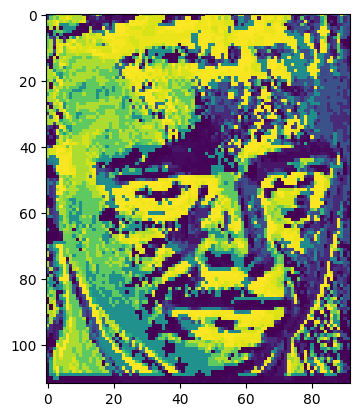

In [128]:
#testing functions above
train_path = './Data/s'

for subject in range(1, NUM_OF_SUBJECT):
    '''
        TODO: test for one subject and make sure it's right
    '''
    path_prefix = f'{train_path}{subject}'
    
    train_data, train_label = make_gallery(path_prefix, [1, NUM_OF_SAMPLES_PER_SUBJECT//2+1])
    test_data, test_label = make_gallery(path_prefix, [NUM_OF_SAMPLES_PER_SUBJECT//2+1, NUM_OF_SAMPLES_PER_SUBJECT+1])
    
    break


## Neural Networks - Nicholas lee

train model using LBP

train model using images

compare each to each other

In [129]:
# Neural Network

## SVM - Ahmed Amer

train model using LBP

train model using images

compare each to each other

In [130]:
#svm

## Comparison of all methods (4 models)

In [131]:
# comparison